In [1]:
import requests
import html
import string
import re
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.collocations import *
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
github_url = 'https://api.github.com/search/repositories'

In [3]:
q = '"TIDAL"'

In [4]:
qparams = {'q' : q, 'sort' : 'forks', 'order': 'desc', 'per_page' : 100}

In [5]:
r = requests.get(url=github_url, params=qparams)
r

<Response [200]>

In [6]:
res = r.json()
res.keys()

dict_keys(['total_count', 'incomplete_results', 'items'])

In [7]:
len(res['items'])

100

In [8]:
res['items'][2]

{'id': 28609243,
 'node_id': 'MDEwOlJlcG9zaXRvcnkyODYwOTI0Mw==',
 'name': 'strawberry',
 'full_name': 'strawberrymusicplayer/strawberry',
 'private': False,
 'owner': {'login': 'strawberrymusicplayer',
  'id': 60241412,
  'node_id': 'MDEyOk9yZ2FuaXphdGlvbjYwMjQxNDEy',
  'avatar_url': 'https://avatars.githubusercontent.com/u/60241412?v=4',
  'gravatar_id': '',
  'url': 'https://api.github.com/users/strawberrymusicplayer',
  'html_url': 'https://github.com/strawberrymusicplayer',
  'followers_url': 'https://api.github.com/users/strawberrymusicplayer/followers',
  'following_url': 'https://api.github.com/users/strawberrymusicplayer/following{/other_user}',
  'gists_url': 'https://api.github.com/users/strawberrymusicplayer/gists{/gist_id}',
  'starred_url': 'https://api.github.com/users/strawberrymusicplayer/starred{/owner}{/repo}',
  'subscriptions_url': 'https://api.github.com/users/strawberrymusicplayer/subscriptions',
  'organizations_url': 'https://api.github.com/users/strawberrymusic

In [9]:
res['items'][2]['description']

':strawberry: Strawberry Music Player'

In [10]:
len(res['items'])

100

In [11]:
stop_words = set(stopwords.words('english'))
def text_cleanup(s):
    # if not a string object, disregard
    if not isinstance(s, str):
        return ''
    
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and w.isalnum()]
    
    # return clean string
    return ' '.join(wt_filt)

In [12]:
text_cleanup(res['items'][2]['description'])

'strawberry strawberry music player'

In [13]:
descr = [text_cleanup(r['description']) for r in res['items']]

In [14]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
bigram_finder = BigramCollocationFinder.from_documents([d.split() for d in descr])

In [15]:
bigram_finder.apply_freq_filter(3)

In [16]:
bigram_freq = list(bigram_finder.ngram_fd.items())
bigram_freq

[(('api', 'tidal'), 4),
 (('tidal', 'music'), 5),
 (('music', 'streaming'), 7),
 (('streaming', 'service'), 5),
 (('music', 'downloader'), 3),
 (('live', 'coding'), 3),
 (('leslie', 'property'), 3),
 (('sea', 'level'), 3),
 (('use', 'force'), 3),
 (('natural', 'resources'), 4)]

In [17]:
df_freq = pd.DataFrame([(' '.join(k), v) for k,v in bigram_freq], columns=['keyphrase', 'count'])
df_freq.sort_values(by='count', ascending=False, inplace=True)
df_freq.set_index('keyphrase', inplace = True)
df_freq

,count
keyphrase,
music streaming,7
tidal music,5
streaming service,5
api tidal,4
natural resources,4
music downloader,3
live coding,3
leslie property,3
sea level,3


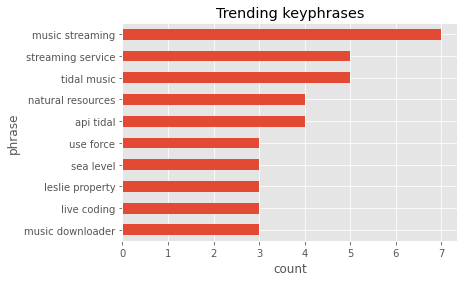

In [18]:
plt.style.use('ggplot')

# render a horizontal bar graph
df_freq.head(20).sort_values(by='count').plot(kind = 'barh')
plt.title('Trending keyphrases')
plt.ylabel('phrase')
plt.xlabel('count')
plt.legend().set_visible(False)
plt.show()